# BIKE SHARING ASSIGNMENT

## 1. DATA UNDERSTANDING

### IGNORE WARNINGS

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

### IMPORTING REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

### IMPORTING & READING THE DATASET

In [3]:
# Importing dataset
data = pd.read_csv('day.csv')
 
# making a local copy of imported data
cpy_data = data 

# To display maximum columns
pd.set_option('max_columns',None)

### NUMBER OF ROWS AND COLUMNS IN DATASET

In [4]:
# To find the number of rows and columns
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')

Dataset has 730 rows and 16 columns.


### NUMBER OF FEATURES

In [5]:
# Looping to find the number of categorical and numerical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 15 numerical features and 1 categorical features.


### LOOKING FOR DUPLICATES IN THE DATASET

In [6]:
# Looking for data duplicates
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### DATA FRAME WITH DATATYPE AND SAMPLE DATA

In [7]:
# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2), 
                            columns = ['Missing_percent']) 
# Dataframe for sampledata
sample_data = pd.DataFrame(data.head(2).T)      

# Concatinating the above dataframe
data_concat = pd.concat([data_type, data_missing, sample_data], axis=1) 

# Renaming the dataframe columns
data_concat.rename(columns = {0: 'Column_1', 
                              1: 'Column_2'}, inplace = True)       
data_concat

,Data_type,Missing_percent,Column_1,Column_2
instant,int64,0.0,1,2
dteday,object,0.0,01-01-2018,02-01-2018
season,int64,0.0,1,1
yr,int64,0.0,0,0
mnth,int64,0.0,1,1
holiday,int64,0.0,0,0
weekday,int64,0.0,6,0
workingday,int64,0.0,0,0
weathersit,int64,0.0,2,2
temp,float64,0.0,14.110847,14.902598


## 2. EDA

### READING ALL COLUMNS

In [8]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### DATA SAMPLE

In [9]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### FROM DATA DICT & UNDERSTANDING

- Column "instant" seems to be a unique identifier of the data and so this can be dropped.
- It's obvious that the target column "cnt" has the sum of "casual" and "registered" that supports data leak.
- Column "dteday" can be removed since similar information is decoded into "yr", "mnth" and "weekday".

### REMOVING THE FEATURE

In [10]:
# Features to be removed
remove_feat = ['instant', 'casual', 'registered', 'dteday']
print(f'Number of features to be removed: {len(remove_feat)}')
print(f'Number of columns in raw data: {data.shape[1]}')

# Removing the list features
for feature in data.columns:
    if feature in remove_feat:
        del data[feature]
        
# Data after removing the features
print(f'Number of columns in processed data: {data.shape[1]}')

Number of features to be removed: 4
Number of columns in raw data: 16
Number of columns in processed data: 12


### COLUMNS AFTER REMOVING FEATURES

In [11]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### RENAMING THE COLUMNS

In [12]:
# Based on understanding from data dictionary renaming the relevant columns
data.rename(columns={'yr':'year', 'mnth':'month', 'temp':'temperature', 'hum':'humidity', 'cnt':'count'}, inplace=True)

# Columns after renaming
data.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

### MAPPING THE REQUIRED DATA POINTS 

In [13]:
# Mapping season
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)

# Mapping month
data.month.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun', 7: 'Jul',
                    8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}, inplace = True)

# Mapping weekday
data.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'}, inplace = True)

# Mapping weathersit
data.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snow',4:'Heavy_snow'}, inplace = True)

# Data sample after mapping.
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### DATA TYPE & COUNT OF UNIQUE VALUES 

In [14]:
# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for unique count
unique_count = pd.DataFrame(data.nunique(), columns = ['Unique_count'])

# Concatinating the above dataframe
data_concat = pd.concat([data_type, unique_count], axis=1) 

data_concat

,Data_type,Unique_count
season,object,4
year,int64,2
month,object,12
holiday,int64,2
weekday,object,7
workingday,int64,2
weathersit,object,3
temperature,float64,498
atemp,float64,689
humidity,float64,594


### OBSERVATION ON TARGET VARIABLE

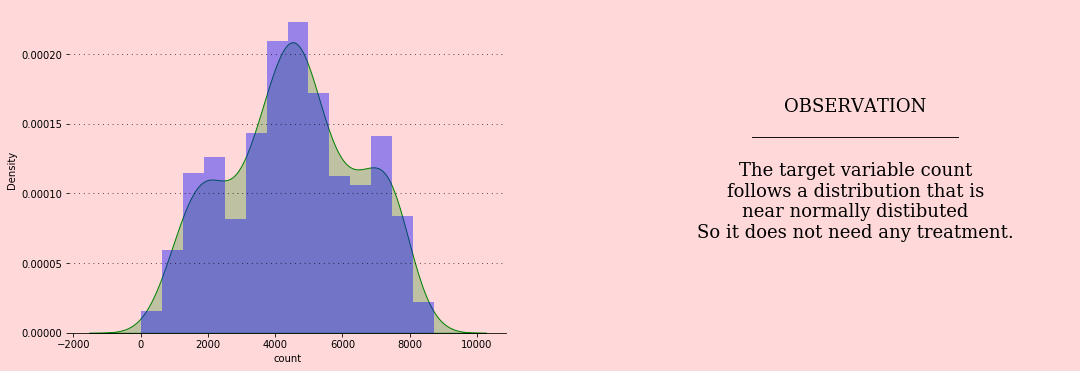

In [15]:
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])

bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)
    
sns.distplot(data['count'], color='b', ax= sec_1, kde_kws={'fill':'True', 'color':'g'})
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sec_2.text(0.5,0.5,f'OBSERVATION\n_______________________\n\n\
The target variable count\nfollows a distribution that is\nnear normally distibuted\n\
So it does not need any treatment.',
ha='center',va='center',size=18, family='serif')

sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

### UNIVARIATE ANALYSIS ON CONTINUOUS VARIABLE

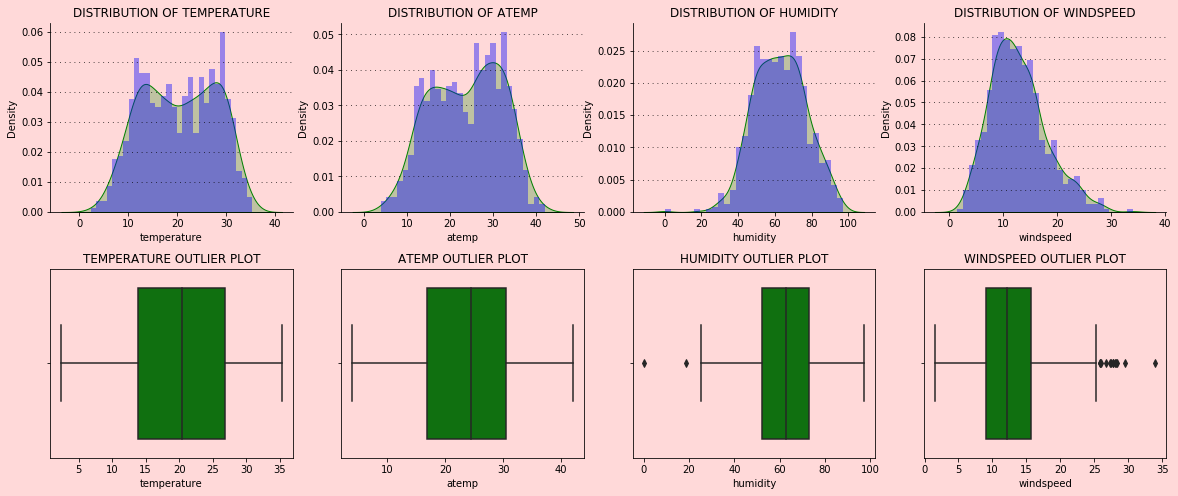

In [16]:
# Creating subplots
fig = plt.figure(figsize=(20,8))
spec = fig.add_gridspec(2,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08]:
    selection.set_facecolor(bg_color)

# Plotting the graph
dist_sec = [sec_01, sec_02, sec_03, sec_04]
box_sec = [sec_05, sec_06, sec_07, sec_08]
cnt = 0
for feature in data.columns:
    if data[feature].nunique() > 100 and feature != 'count':
        sns.distplot(data[feature], ax=dist_sec[cnt], bins=30, color = 'b', kde_kws={'fill':'True', 'color':'g'})
        dist_sec[cnt].set_title('DISTRIBUTION OF '+ feature.upper())
        dist_sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        sns.boxplot(data[feature], ax=box_sec[cnt],  color='green', fliersize=5)
        box_sec[cnt].set_title(feature.upper() + ' OUTLIER PLOT')
        cnt+=1
        
for location in ['top', 'right']:
    for selection in [sec_01, sec_02, sec_03, sec_04]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)
            

### UNIVARIATE ANALYSIS ON CATEGORICAL VARIABLES

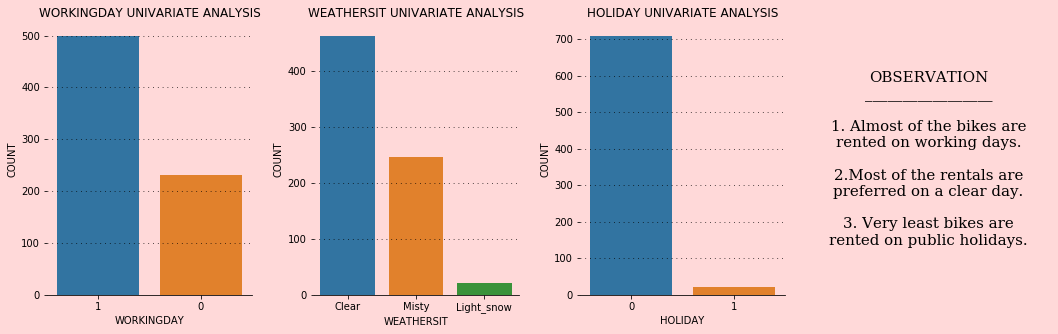

In [17]:
fig = plt.figure(figsize=(18,5))
spec = fig.add_gridspec(1,4)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[0,2])
sec_4 = plt.subplot(spec[0,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4]:
    selection.set_facecolor(bg_color)

feats = ['workingday', 'weathersit', 'holiday']
sec = [sec_1, sec_2, sec_3]
cnt=0
for feature in feats:
        sns.countplot(data[feature], ax=sec[cnt], order=data[feature].value_counts().index)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        sec[cnt].set_title(feature.upper()+' UNIVARIATE ANALYSIS')
        sec[cnt].set_xlabel(feature.upper())
        sec[cnt].set_ylabel('COUNT')
        cnt+=1

sec_4.text(0.4,0.5,'OBSERVATION\n_________________\n\n\
1. Almost of the bikes are\nrented on working days.\n\n2.Most of the rentals are\n\
preferred on a clear day.\n\n3. Very least bikes are\n\
rented on public holidays.',ha='center',va='center', 
size=15, family='serif')         

# Removing axes and spines
for location in ['top', 'right', 'left', 'bottom']:
        sec_4.spines[location].set_visible(False)
        sec_4.xaxis.set_visible(False)
        sec_4.yaxis.set_visible(False)
            
for section in sec:
    for location in ['top', 'right', 'left']:
            section.spines[location].set_visible(False)            

### BIVARIATE ANALYSIS

#### CATEGORICAL VARIABLE WITH TARGET

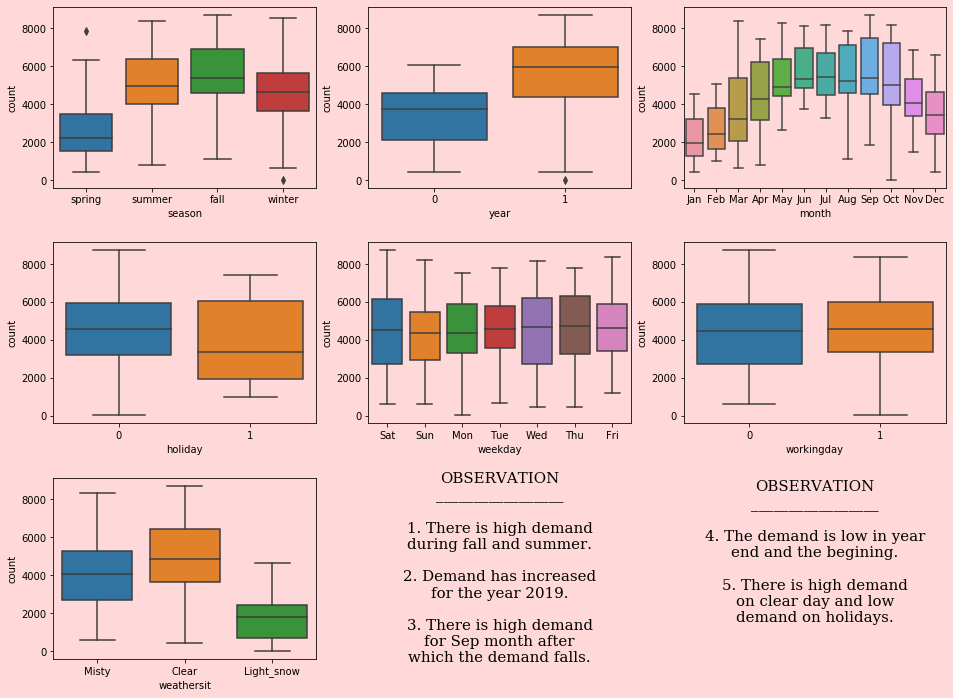

In [18]:
fig = plt.figure(figsize=(16,12))
spec = fig.add_gridspec(3,3)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])
sec_08 = fig.add_subplot(spec[2,1])
sec_09 = fig.add_subplot(spec[2,2])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, 
                  sec_05, sec_06, sec_07, sec_08, sec_09]:
    selection.set_facecolor(bg_color)
    
# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07]
cnt = 0
for feature in data.columns:
    if data[feature].nunique() < 20:
        sns.boxplot(x=data[feature], y=data['count'], ax=sec[cnt])
        cnt+=1
        
        
# Narrating the observations
sec_08.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
1. There is high demand\nduring fall and summer.\n\n2. Demand has increased\nfor the year 2019.\
\n\n3. There is high demand\nfor Sep month after\nwhich the demand falls.',ha='center',va='center', 
size=15, family='serif')  

sec_09.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
4. The demand is low in year\nend and the begining.\n\n5. There is high demand\n\
on clear day and low\ndemand on holidays.\n\n',ha='center',va='center', 
size=15, family='serif') 

for section in [sec_08, sec_09]:
    for location in ['top', 'right', 'left', 'bottom']:
            section.spines[location].set_visible(False)
            section.xaxis.set_visible(False)
            section.yaxis.set_visible(False)       

#### CONTINUOUS VARIABLE WITH TARGET

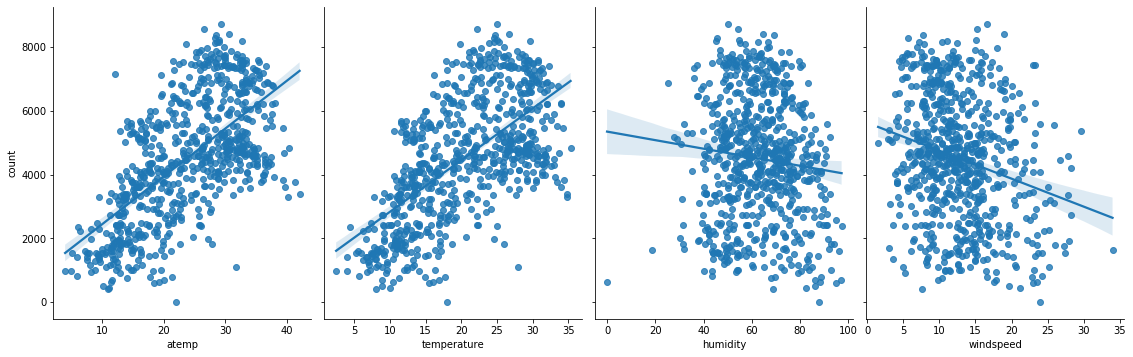

In [19]:
sns.pairplot(data, x_vars= ['atemp', 'temperature', 'humidity', 'windspeed'],
             y_vars= ['count'], kind='reg', diag_kind='auto', height=5, aspect=0.8)
plt.show()

#### INFERENCE:
- Demand of the rentals high postive correlation with the temperature and atemp.
- Eventhough humidity is scattered around it has little negative correlation with rentals.
- Eventhough windspeed is scattered elsewhere, demand of rental decreases with increase in windspeed.

### CORELATION HEATMAP

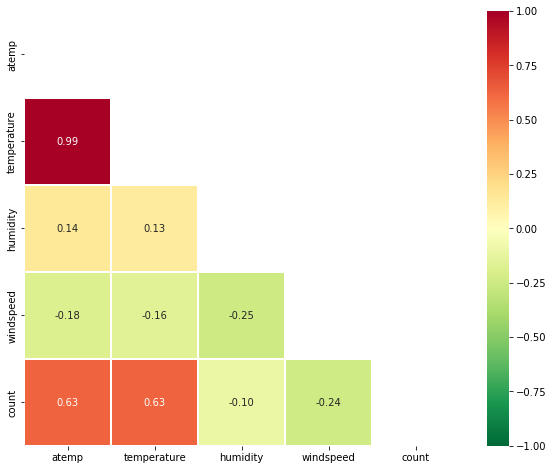

In [20]:
feats = ['atemp', 'temperature', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(10,8))
sns.heatmap(data[feats].corr(),
            annot=True , 
            fmt='.2f',
            vmax=1,
            vmin=-1,
            mask=np.triu(data[feats].corr()),
            linewidths=1,
            linecolor = 'white',
            square=True,
            cmap='RdYlGn_r')

plt.show()

#### INFERENCE
- count has good positive correlation with atemp and temperature.
- count has negative correlation with windspeed and humidity.
- Temperature and atemp has high correlation, means multicolinearity and has to be taken care.

## 3. DATA PREPARATION FOR LINEAR MODEL

#### IMPORTING REQUIRED LIBRARIES

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#### ONE HOT ENCODING

In [22]:
# Columns before one hot encoding
print(data.columns)

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')


In [23]:
# One hot encoding the data
data = pd.get_dummies(data=data,
                      columns=['season', 'month', 'weekday', 'weathersit'],
                      drop_first = True)

In [24]:
# Columns after one hot encoding
print(data.columns)

Index(['year', 'holiday', 'workingday', 'temperature', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light_snow',
       'weathersit_Misty'],
      dtype='object')


### DATA SPLIT

#### FRAMING DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [25]:
# Data shape before split
print('Shape of the data before splitting:',data.shape)

# Dataframe with only dependent variable
y = data.pop('count')
print('Shape of data with dependent variable:', y.shape)

# Dataframe with all independent variable
X = data
print('Shape of data with independent variable:', X.shape)

Shape of the data before splitting: (730, 30)
Shape of data with dependent variable: (730,)
Shape of data with independent variable: (730, 29)


#### PERFORMING TRAIN TEST SPLIT WITH 70-30 PROPORTION

In [26]:
# Applying the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Shape of the data
print('Shape of train independent data:', X_train.shape)
print('Shape of train dependent data:', y_train.shape)
print('Shape of test independent data:', X_test.shape)
print('Shape of test dependent data:', y_test.shape)

Shape of train independent data: (511, 29)
Shape of train dependent data: (511,)
Shape of test independent data: (219, 29)
Shape of test dependent data: (219,)


#### FEATURE SCALING

In [27]:
# Scaling and fit transforming continuous training set variables
cnt_feats = ['temperature', 'atemp', 'humidity', 'windspeed']
X_train[cnt_feats] = MinMaxScaler().fit_transform(X_train[cnt_feats])

# Data sample after fit transform
X_train.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_snow,weathersit_Misty
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


## 4. MODEL BUILDING

### ELIMINATION BY RFE

In [28]:
# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# Eliminating 50% of feature by rfe approach
rfe = RFE(lin_reg,14)
rfe.fit(X_train,y_train)

# Columns listed based on weights
(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

[('year', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('month_Aug', False, 7),
 ('month_Dec', True, 1),
 ('month_Feb', False, 9),
 ('month_Jan', False, 15),
 ('month_Jul', True, 1),
 ('month_Jun', False, 16),
 ('month_Mar', True, 1),
 ('month_May', False, 5),
 ('month_Nov', True, 1),
 ('month_Oct', False, 6),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 13),
 ('weathersit_Light_snow', True, 1),
 ('weathersit_Misty', True, 1)]

In [29]:
# Function for building statsmodel
def model(feats):
    X_train_stat = sm.add_constant(X_train[feats])
    lin_reg = sm.OLS(y_train, X_train_stat).fit()
    print(lin_reg.summary())
    return lin_reg

# Function to compute VIFs 
def vif_mod(feat):
    data1 = X_train[feat]
    vif = pd.DataFrame()
    vif['Columns'] = data1.columns
    vif['VIF'] = [variance_inflation_factor(data1.values, i) for i in range(data1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [30]:
# Varibles selected based on RFE
sup_cols = X_train.columns[rfe.support_]

# X_train data frame with selected columns
X_train_RFE = X_train[sup_cols]
X_train_RFE.columns

Index(['year', 'temperature', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Mar',
       'month_Nov', 'month_Sep', 'weathersit_Light_snow', 'weathersit_Misty'],
      dtype='object')

### STATS MODEL - 1

In [31]:
# Columns selected based on RFE
feats = ['year', 'temperature', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Mar',
       'month_Nov', 'month_Sep', 'weathersit_Light_snow', 'weathersit_Misty']

model(feats)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.23e-185
Time:                        23:34:27   Log-Likelihood:                -4127.7
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     496   BIC:                             8349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3198.55

#### CORELATION HEATMAP TO CHECK MULTICOLLINEARITY

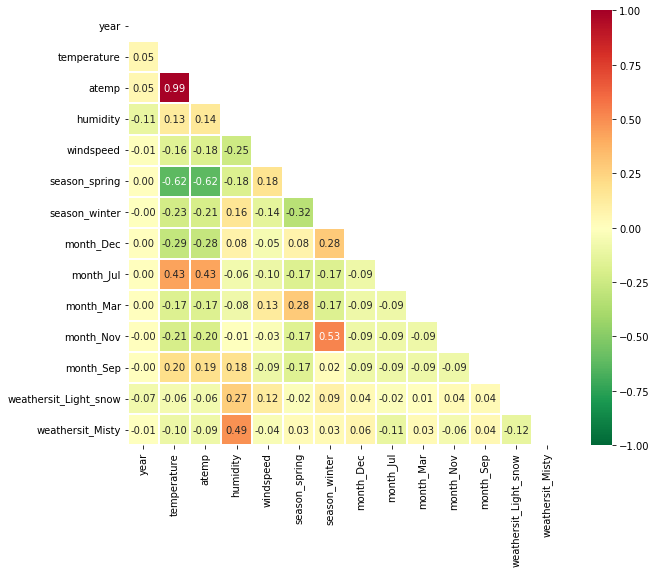

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(data[feats].corr(),
            annot=True , 
            fmt='.2f',
            vmax=1,
            vmin=-1,
            mask=np.triu(data[feats].corr()),
            linewidths=1,
            linecolor = 'white',
            square=True,
            cmap='RdYlGn_r')

plt.show()

### STATS MODEL -2

In [33]:
# Removed atemp since it has high p-value & high VIF
feats = ['year', 'temperature', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Mar',
       'month_Nov', 'month_Sep', 'weathersit_Light_snow', 'weathersit_Misty']

model(feats)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.62e-186
Time:                        23:34:28   Log-Likelihood:                -4129.2
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     497   BIC:                             8346.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3264.92

### STATS MODEL -3

In [34]:
# Removed humidity since it has high VIF
feats = ['year', 'temperature', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Mar',
       'month_Nov', 'month_Sep', 'weathersit_Light_snow', 'weathersit_Misty']

model(feats)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.26e-184
Time:                        23:34:28   Log-Likelihood:                -4137.3
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2482.43

### STATS MODEL -4

In [35]:
# Removed month_sep since it has high P-Value
feats = ['year', 'temperature', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Mar',
       'month_Nov', 'month_Sep', 'weathersit_Light_snow', 'weathersit_Misty']

model(feats)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.26e-184
Time:                        23:34:28   Log-Likelihood:                -4137.3
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2482.43

### STATS MODEL -5

In [36]:
# Removed month_nov since it has high P-Value
feats = ['year', 'temperature', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Mar',
        'month_Sep', 'weathersit_Light_snow', 'weathersit_Misty']

model(feats)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.96e-181
Time:                        23:34:28   Log-Likelihood:                -4146.4
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2241.31

### 5. MODEL EVALUATION

In [37]:
# Function for linear model
def com_model(X,y):
    lin_reg_ful = LinearRegression()
    lin_reg_ful.fit(X,y)
    return lin_reg_ful

In [38]:
# Model with selected column that has low vif and have better adjusted R-Squared value
feats = ['year', 'temperature', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Mar',
        'month_Sep', 'weathersit_Light_snow', 'weathersit_Misty']

# Final model
fin_len_reg = com_model(X_train[feats],y_train)
print(fin_len_reg.intercept_,fin_len_reg.coef_)

2241.314442486033 [ 2007.34570123  3730.72973151  -785.07264897 -1256.03250614
   486.99461926  -356.39803903  -493.54901569   492.23449034
   449.1706991  -2166.21218429  -665.33310842]


#### RESIDUAL ANALYSIS

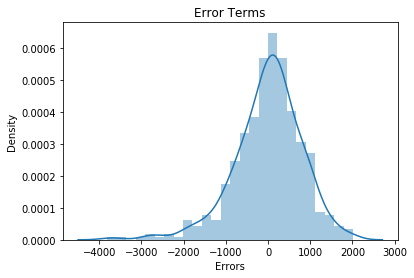

In [39]:
y_train_pred = fin_len_reg.predict(X_train[feats])

# Function for hist
def resd_plot(actual, preds):
    sns.distplot(actual-preds)
    plt.title('Error Terms')
    plt.xlabel('Errors')

# Ploting the graph
resd_plot(y_train, y_train_pred)

### Pattern on actual and prediction

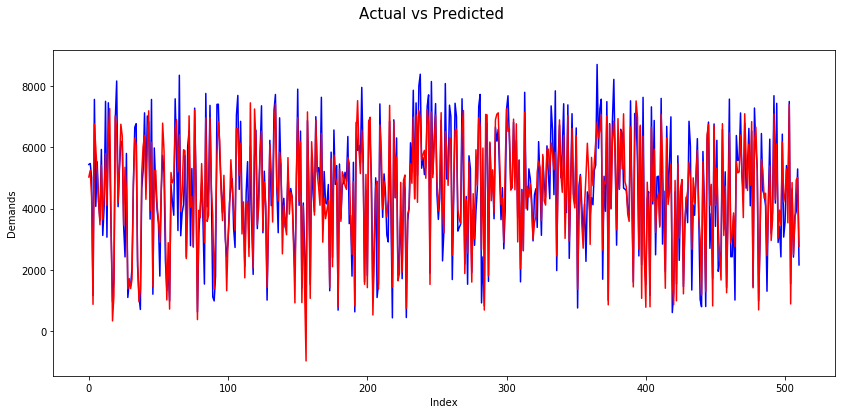

In [40]:
plt.figure(figsize=(14,6))
cnt = [i for i in range(0,len(X_train),1)]
plt.plot(cnt,y_train, color="blue")
plt.plot(cnt,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [41]:
# Scaling variable in X_test
feats = ['temperature','atemp','humidity','windspeed']

# Test data to be transformed only, no fitting
X_test[feats] = MinMaxScaler().fit_transform(X_test[feats])

# Columns from our final model
feats = ['year', 'temperature', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Mar',
        'month_Sep', 'weathersit_Light_snow', 'weathersit_Misty']

# Predict the values for test data
y_test_pred = fin_len_reg.predict(X_test[feats])

# R squared for test and pred 
np.round(r2_score(y_test,y_test_pred),2)

0.82

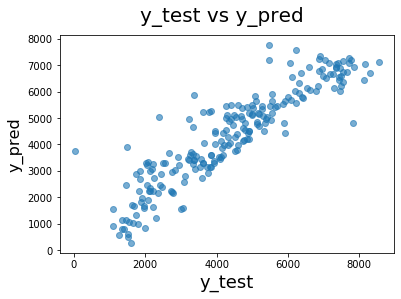

In [42]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.6)
fig.suptitle('y_test vs y_pred', fontsize = 20)    
plt.xlabel('y_test', fontsize = 18)                 
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# CONCLUSION

- Training R-Squared - 82.6%
- Testing R-Squared - 82 %

Its a best fit model that performs well in both training and testing with low VIF and better Adjusted R-squared